# **Modul 2: Data Analysis**
# Descriptive Statistics
Dataset : all_cars.csv

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns


# **No.1**
* Rename column 'Unnamed: 0' to 'id'!
* If the column 'Unnamed: 0' does not exist, reset the index. Then the leftmost column named 'index' change to 'id'!

In [ ]:
# Load dataset: all_cars.csv
df_car = pd.read_csv('all_cars.csv')
df_car.head()

,Unnamed: 0,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
# rename the first column
df_car.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df_car.head()

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [ ]:
df_car['model'].value_counts()[:10]

Yaris     2122
Aygo      1961
A3        1929
Q3        1417
A4        1381
A1        1347
Tucson    1300
I10       1092
A5         882
Q5         877
Name: model, dtype: int64

# **No.2**

In [ ]:
# Show a statistical description of the df_car dataset.
df_car.describe(include='all') 

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,22266.000000,22266,22266,22266.000000,22266.000000,22266,22266.000000,22266,22266.000000,22266.000000,22266.000000
unique,NaN,3,60,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,NaN,Audi,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,NaN,10668,2122,NaN,NaN,11806,NaN,12052,NaN,NaN,NaN
mean,11132.500000,NaN,NaN,2016.995509,17542.591575,NaN,23501.863604,NaN,115.473592,55.151181,1.688489
std,6427.784883,NaN,NaN,2.133576,10589.835312,NaN,21111.157417,NaN,68.835239,14.834181,0.566379
min,0.000000,NaN,NaN,1997.000000,850.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000
25%,5566.250000,NaN,NaN,2016.000000,9999.000000,NaN,7200.000000,NaN,30.000000,44.800000,1.400000
50%,11132.500000,NaN,NaN,2017.000000,14999.000000,NaN,18354.000000,NaN,145.000000,55.400000,1.600000
75%,16698.750000,NaN,NaN,2019.000000,21991.000000,NaN,33100.750000,NaN,145.000000,62.800000,2.000000


# **No.3**

Measure of Central Tendency is a measurement to describe the central position of the frequency distribution for a group of data. Another term is Estimate of Location, which is an estimate of where most of the data is located
(Practical Statistic for Data Science - Bruce, 2021 )


In [ ]:
# Measure of Central Tendency from the 'model' and 'price' columns 
df_car.describe(include='all').loc[['mean','50%','top']][['model','price']]

,model,price
mean,NaN,17542.591575
50%,NaN,14999.000000
top,Yaris,NaN


In [ ]:
# The model column can only measure the mode because the data is categorical (qualitative).
print('Mode model column \n', df_car['model'].mode(), '\n')

Mode model column 
 0    Yaris
dtype: object 



In [ ]:
# The price column can use the mean or the median because the data is numerical (quantitative) continuously
# The median is robust (not sensitive to extreme values) than the mean.
print('Mode price column \n', df_car['price'].mode(), '\n')
print('Mean price column \n', df_car['price'].mean(), '\n')
print('Median price column \n', df_car['price'].median(), '\n')
 

Mode price column 
 0    9995
dtype: int64 

Mean price column 
 17542.591574598042 

Median price column 
 14999.0 



# **No.4**

* The measure of spread is a measurement to describe how spread out our data is. Another term is Estimates of Variability/Dispersion.

In [ ]:
# Measure of Spread from 'price' column
# Range
df_car['price'].max() - df_car['price'].min()

144150

* The standard deviation is the most frequently used measure of variability. In simple terms, the standard deviation is the mean absolute deviation from the mean value. The deviation means the difference between each data and its average value.

In [ ]:
# Variance
df_car['price'].var()

112144611.93109098

In [ ]:
# Variance
df_car['price_spread'] = (df_car['price'] - df_car['price'].mean())**2
df_car 

df_car['price_spread'].sum()/(len(df_car['price_spread'])-1)

112144611.93109271

In [ ]:
# Standard deviation
df_car['price'].std()

10589.835311802115

In [ ]:
# Standard deviation
np.sqrt(df_car['price_spread'].sum()/(len(df_car['price_spread'])-1))

10589.835311802195

* The percentile is the value that divides the data that has been sorted from smallest to largest into 100 equal parts.
* Interquartile Range (IQR) is the distance between Q1 and Q3. So the formula is IQR = Q3 - Q1. IQR can be used instead of the standard deviation when the data is not normally distributed because the standard deviation is very sensitive to outliers. In general, the standard deviation is equal to 1.348 times the IQR.

In [ ]:
# IQR
q1 = df_car['price'].quantile(0.25)
q3 = df_car['price'].quantile(0.75)
IQR = q3 - q1
IQR


11992.0

# **No.5**

Analyze outliers of price column. Outliers or Extreme Cases are values that are very far from other values in a dataset
(Bruce, 2021)

In [ ]:
# Lower limit and Upper limit of price column
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

# Outliers are data that are outside the Upper and Lower Limits
outlier = df_car[(df_car['price']<lower) | (df_car['price']>upper)]
outlier

print('Upper Limit  :', upper)
print('Lower Limit :', lower)

print('Number of outliers:', len(outlier))

Upper Limit  : 39979.0
Lower Limit : -7989.0
Number of outliers: 808


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


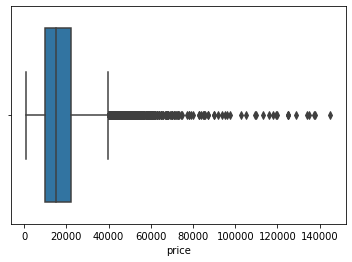

In [ ]:
sns.boxplot(df_car['price']);

# **No.6**
Variables/columns that have a right-skewed distribution

In [ ]:
# skewed to the right (mean > median):
# price, mileage, engineSize, price_spread
df_car.describe().loc[['mean','50%']]

,id,year,price,mileage,tax,mpg,engineSize,price_spread
mean,11132.5,2016.995509,17542.591575,23501.863604,115.473592,55.151181,1.688489,1.121396e+08
50%,11132.5,2017.000000,14999.000000,18354.000000,145.000000,55.400000,1.600000,4.163357e+07


# **No.7**
The Mean and Median values of the 'mileage' column are very different. Proof that the column is normally distributed or not

In [ ]:
# Ho : sample is normally distributed
# Ha: sample is NOT normally distributed

# p-value > 0.05 : accept Ho --> sample is normally distributed
# p-value < 0.05 : reject Ho --> sample NOT normally distributed (Ha)

In [ ]:
def normal(kolom):
    stat, pvalue = stats.normaltest(kolom)
    print(f'p-value {kolom.name} : {pvalue:.10f}' )
    

    if pvalue < 0.05:
        print(f'Kolom {kolom.name} NOT normally distributed')
    else:
        print(f'Kolom {kolom.name} normally distributed')
    
normal(df_car['mileage'])

p-value mileage : 0.0000000000
Kolom mileage NOT normally distributed


In [ ]:
# Mean and Median difference of 'mileage'
df_car.describe().loc[['mean','50%']][['mileage']]

,mileage
mean,23501.863604
50%,18354.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


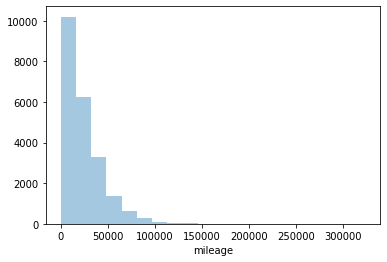

In [ ]:
# Histogram
sns.distplot(df_car['mileage'], bins=20, kde=False);

In [ ]:
frequency = 10000 # an estimate of the intensity of a car with mileage between 1-16150 appears
num_Car = df_car['mileage'].count() # total number of cars

prob2 = frequency/num_Car
prob2



0.4491152429713465

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


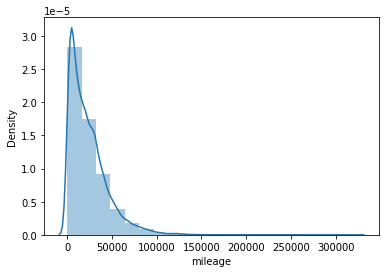

In [ ]:
# Density plot
sns.distplot(df_car['mileage'], bins=20, kde=True);

In [ ]:
# probability to get mileage value between 1-16150
alas = df_car['mileage'].max()/20 # mileage value range between 1-16150
tinggi = 0.000029 # density probability

prob = alas * tinggi
prob

0.46835

In [ ]:
np.linspace(df_car['mileage'].min(), df_car['mileage'].max(), 21)

array([1.0000000e+00, 1.6150950e+04, 3.2300900e+04, 4.8450850e+04,
       6.4600800e+04, 8.0750750e+04, 9.6900700e+04, 1.1305065e+05,
       1.2920060e+05, 1.4535055e+05, 1.6150050e+05, 1.7765045e+05,
       1.9380040e+05, 2.0995035e+05, 2.2610030e+05, 2.4225025e+05,
       2.5840020e+05, 2.7455015e+05, 2.9070010e+05, 3.0685005e+05,
       3.2300000e+05])